In [1]:
import tensorflow as tf
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("~/datacsv/HousingData.csv")

In [3]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
data.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [6]:
data1=data.dropna()

In [7]:
x = data1.iloc[:,0:13].values
y=data1.iloc[:,13].values

In [8]:
x

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [4.5270e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        9.0800e+00],
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00]])

In [9]:
y

array([24. , 21.6, 34.7, 33.4, 28.7, 27.1, 16.5, 15. , 18.9, 21.7, 20.4,
       19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6, 15.2, 14.5, 15.6, 13.9,
       16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2, 13.1, 13.5, 21. , 24.7,
       30.8, 34.9, 26.6, 25.3, 21.2, 19.3, 20. , 14.4, 19.4, 19.7, 25. ,
       18.9, 35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. ,
       23.5, 19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 21.4, 20. , 20.8,
       21.2, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 23.6, 28.7, 22.6,
       22. , 25. , 20.6, 28.4, 21.4, 38.7, 43.8, 33.2, 27.5, 26.5, 18.6,
       20.1, 19.5, 19.5, 20.4, 19.8, 19.4, 21.7, 22.8, 18.8, 18.7, 18.5,
       19.2, 22. , 20.3, 20.5, 18.8, 21.4, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 15.6, 18.1, 17.4, 17.1, 17.8, 14. , 14.4, 13.4, 15.6, 11.8,
       13.8, 15.4, 19.6, 19.4, 17. , 13.1, 24.3, 23.3, 27. , 50. , 50. ,
       22.7, 25. , 50. , 23.8, 22.3, 17.4, 19.1, 23.1, 22.6, 29.4, 23.2,
       29.9, 37.2, 39.8, 36.2, 37.9, 26.4, 29.6, 32

In [10]:
# splitting the training & test sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2)

In [11]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
mc=MinMaxScaler()
x_train1 = mc.fit_transform( x_train)
X_test1 = mc.fit_transform( x_test)

In [12]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [13]:
# Initialize the model
model=Sequential()

# Build input layer & Hidden layer
model.add(Dense(units=104, activation='relu', input_dim=13))
model.add(Dropout(rate=0.1))

# Building second layer
model.add(Dense(units=52,activation ='relu'))
model.add(Dropout(rate=0.1))

# Building third layer
model.add(Dense(units=26,activation ='relu'))
model.add(Dropout(rate=0.1))

#Adding outer layer
model.add(Dense(units = 1, activation='linear'))

# compile the model
model.compile(optimizer='adam', loss='mae')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 104)               1456      
                                                                 
 dropout (Dropout)           (None, 104)               0         
                                                                 
 dense_1 (Dense)             (None, 52)                5460      
                                                                 
 dropout_1 (Dropout)         (None, 52)                0         
                                                                 
 dense_2 (Dense)             (None, 26)                1378      
                                                                 
 dropout_2 (Dropout)         (None, 26)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 2

In [14]:
#Fit model:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping_minitor = EarlyStopping(patience=200)

#train model:
history = model.fit(x_train, y_train,
 epochs=200,
 batch_size=32,
 validation_split=0.2,
 callbacks=[early_stopping_minitor])

Epoch 1/200
8/8 [==============================] - 0s 18ms/step - loss: 39.6231 - val_loss: 22.8881
Epoch 2/200
8/8 [==============================] - 0s 4ms/step - loss: 20.7498 - val_loss: 14.3994
Epoch 3/200
8/8 [==============================] - 0s 4ms/step - loss: 15.4612 - val_loss: 11.0071
Epoch 4/200
8/8 [==============================] - 0s 4ms/step - loss: 11.5168 - val_loss: 6.4027
Epoch 5/200
8/8 [==============================] - 0s 4ms/step - loss: 9.9489 - val_loss: 9.4750
Epoch 6/200
8/8 [==============================] - 0s 4ms/step - loss: 9.4334 - val_loss: 6.9053
Epoch 7/200
8/8 [==============================] - 0s 4ms/step - loss: 9.0070 - val_loss: 8.3585
Epoch 8/200
8/8 [==============================] - 0s 4ms/step - loss: 9.0540 - val_loss: 7.3014
Epoch 9/200
8/8 [==============================] - 0s 4ms/step - loss: 8.6411 - val_loss: 5.8014
Epoch 10/200
8/8 [==============================] - 0s 4ms/step - loss: 7.7550 - val_loss: 6.3032
Epoch 11/200
8/8 [===

In [15]:
y_pred = model.predict(x_test)

3/3 [==============================] - 0s 1ms/step


dict_keys(['loss', 'val_loss'])


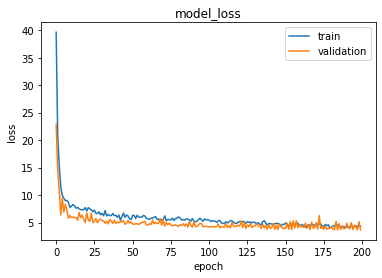

In [16]:
# Plot loss of train and test set
print(history.history.keys())

#Loss in train and test:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [17]:
#evaluate the result
print('Evaluation on test data')
results = model.evaluate(x_train, y_train)
print('mae: ', results)

Evaluation on test data
10/10 [==============================] - 0s 651us/step - loss: 3.3735
mae:  3.3734731674194336


In [18]:
data.MEDV.describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

In [20]:
#mae/mean ratio : 14%

3.37/22.53

0.14957833999112294